# <a id="top"></a>  📊 Exploratory Data Analysis of ABCDEats Dataset
Authors:<br><br>
Student Name - Gonçalo Custódio<br>
- Student id - 20211643<br>
- Contact e-mail - 20211643@novaims.unl.pt<br>
  
Student Name - Diogo Correia<br>
- Student id - 20211586<br>
- Contact e-mail - 20211586@novaims.unl.pt<br>
  
Student Name - João Santos<br>
- Student id - 20211691<br>
- Contact e-mail - 20211691@novaims.unl.pt<br>
  
Student Name - Nuno Bernardino<br>
- Student id - 20211546<br>
- Contact e-mail - 20211546@novaims.unl.pt<br>

## Objectives
This notebook performs an **Exploratory Data Analysis (EDA)** on the ABCDEats dataset to uncover insights into customer behaviors, spending patterns, and trends that could support strategic decisions. Our analysis aims to:

1. **Summarize Key Statistics**: Calculate and interpret key measures to understand data characteristics.
2. **Identify Trends and Patterns**: Examine promotional effectiveness, payment preferences, regional concentration, and purchasing patterns.
3. **Detect Anomalies**: Highlight outliers or unusual data points that may reveal unique customer segments or operational insights.
4. **Feature Engineering**: Create new features like order frequency and average order value to enhance analysis.
5. **Visualize Findings**: Use charts and graphs to communicate our insights clearly and effectively.

## Index

1. **Exploration of the Dataset**
2. **Summary of Important Statistics**<br>
    >2.1. **Correlation**<br>
    2.2. **Box-Plot**<br>
    2.2.1. **Box-Plots of the Mean of CUI's, DOW's, HR's**<br>
    2.3. **Histograms**<br>
    2.4 **Heatmaps**<br>
3. **Create New Features**
4. **Identify Trends, Patterns, or Anomalies**
5. **Conclusion**

# Imports

In [1]:
#!pip install kmodes
#!pip install somoclu
#!pip install minisom


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import math
from scipy.stats import chi2_contingency
import numpy as np 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
#from somoclu import Somoclu
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA   
from sklearn.metrics import silhouette_score
from minisom import MiniSom

**Read the Dataset**

In [2]:
data = pd.read_excel("VIF_&_Scaled_DM2425_ABCDEats_DATASET.xlsx", sheet_name="Sheet1")

In [3]:
data

,customer_age,vendor_count,is_chain,first_order,last_order,top_cuisine_ratio,weekend_spending,weekday_spending,weekend_spending_ratio,products_per_vendor,region_avg_spending,age_spending_interaction,last_promo,payment_method,regular_customer,cuisine_loyalty
0,0.2250,0.04878,0.012048,0.000000,0.011111,1.000000,0.034483,0.013333,0.020776,0.035714,0.113810,0.014172,0.155609,0.03268,0,0
1,0.2125,0.04878,0.024096,0.000000,0.011111,0.667361,0.034483,0.013333,0.031234,0.014286,0.892586,0.008903,0.011138,0.03268,0,1
2,0.4750,0.02439,0.024096,0.000000,0.011111,1.000000,0.034483,0.013333,0.065217,0.028571,0.591596,0.009531,0.011138,0.00000,0,0
3,0.0000,0.04878,0.012048,0.000000,0.022222,0.565906,0.034483,0.013333,0.019011,0.021429,0.591596,0.000000,0.155609,0.03268,0,1
4,0.2500,0.04878,0.000000,0.000000,0.022222,0.737193,0.034483,0.013333,0.010823,0.035714,0.591596,0.030228,1.000000,0.03268,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,0.3750,0.02439,0.012048,0.244444,0.000000,1.000000,0.034483,0.000000,0.033259,0.014286,0.892586,0.014754,0.000000,0.03268,1,0
31884,0.0000,0.02439,0.000000,0.244444,0.000000,1.000000,0.034483,0.000000,0.033259,0.014286,0.892586,0.000000,0.155609,0.03268,1,0
31885,0.3000,0.02439,0.012048,0.244444,0.000000,1.000000,0.034483,0.000000,0.033727,0.014286,0.892586,0.011640,1.000000,0.03268,1,0
31886,0.4250,0.02439,0.000000,0.244444,0.000000,1.000000,0.034483,0.000000,0.049875,0.014286,0.892586,0.011151,0.011138,0.03268,1,0


In [4]:
data.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
customer_age,31888.0,0.335992,0.102291,0.0,0.275000,0.325000,0.387500,1.0
vendor_count,31888.0,0.075673,0.067600,0.0,0.024390,0.048780,0.097561,1.0
is_chain,31888.0,0.033962,0.047922,0.0,0.012048,0.024096,0.036145,1.0
first_order,31888.0,0.316190,0.267465,0.0,0.077778,0.244444,0.500000,1.0
last_order,31888.0,0.707506,0.258068,0.0,0.544444,0.777778,0.922222,1.0
top_cuisine_ratio,31888.0,0.740841,0.238252,0.0,0.543636,0.737775,1.000000,1.0
weekend_spending,31888.0,0.046801,0.064659,0.0,0.000000,0.034483,0.068966,1.0
weekday_spending,31888.0,0.040155,0.051400,0.0,0.013333,0.026667,0.053333,1.0
weekend_spending_ratio,31888.0,0.030993,0.047924,0.0,0.000000,0.017341,0.041943,1.0
products_per_vendor,31888.0,0.025508,0.019205,0.0,0.014286,0.021429,0.028571,1.0


CLUSTERING
[⬆️ Back to Top](#top)

TIPOS DE CLUSTERING QUE AFINAL VAMOS USAR

K-MEANS 

SOM - WITH K-MEANS

HIERARCHICAL CLUSTERING - WITH K-MEANS AND SOM

DBSCAN

K-PROTOTYPES

Group 1: Customer Demographics

customer_age

is_chain

regular_customer

cuisine_loyalty


Group 2: Spending Behavior

weekend_spending

weekday_spending

weekend_spending_ratio

products_per_vendor

region_avg_spending

age_spending_interaction


Group 3: Order Timing & Promotions

first_order

last_order

last_promo

payment_method


Group 4 (Optional): Top-Specific Behavior

top_cuisine_ratio

vendor_count

In [5]:
# Define the groups as subsets of the dataset
group_1 = data[['customer_age', 'is_chain', 'regular_customer', 'cuisine_loyalty']]  # Customer Demographics
group_2 = data[['weekend_spending', 'weekday_spending', 'weekend_spending_ratio',   # Spending Behavior
                'products_per_vendor', 'region_avg_spending', 'age_spending_interaction']]
group_3 = data[['first_order', 'last_order', 'last_promo', 'payment_method']]       # Order Timing & Promotions
group_4 = data[['top_cuisine_ratio', 'vendor_count']]                               # Top-Specific Behavior # Top-Specific Behavior (Optional)

# Display the group assignments for clarity
groups_summary = {
    "Group 1: Customer Demographics": group_1,
    "Group 2: Spending Behavior": group_2,
    "Group 3: Order Timing & Promotions": group_3,
    "Group 4: Top-Specific Behavior (Optional)": group_4
}

groups_summary


{'Group 1: Customer Demographics':        customer_age  is_chain  regular_customer  cuisine_loyalty
 0            0.2250  0.012048                 0                0
 1            0.2125  0.024096                 0                1
 2            0.4750  0.024096                 0                0
 3            0.0000  0.012048                 0                1
 4            0.2500  0.000000                 0                1
 ...             ...       ...               ...              ...
 31883        0.3750  0.012048                 1                0
 31884        0.0000  0.000000                 1                0
 31885        0.3000  0.012048                 1                0
 31886        0.4250  0.000000                 1                0
 31887        0.3750  0.000000                 1                0
 
 [31888 rows x 4 columns],
 'Group 2: Spending Behavior':        weekend_spending  weekday_spending  weekend_spending_ratio  \
 0              0.034483          0.013333   

## K-Means Clustering

**K-Means** is a popular **centroid-based clustering algorithm** that partitions data into **K distinct clusters**. It is simple, efficient, and widely used for customer segmentation, behavior analysis, and more.

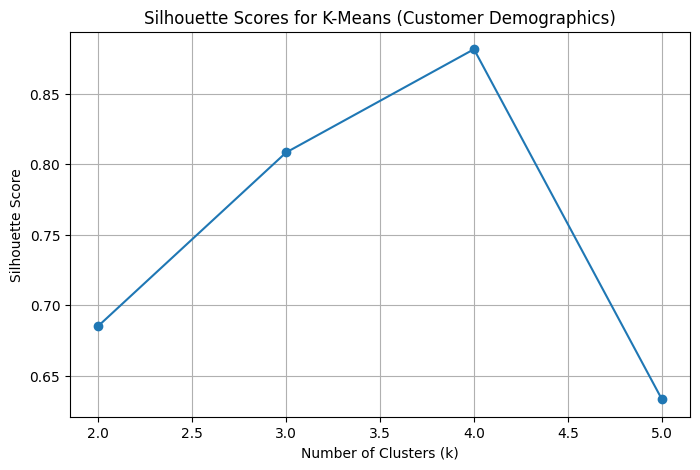

(4, 0.8818098231655875)

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Apply K-Means clustering for different numbers of clusters
k_values = range(2, 6)  # Trying 2 to 5 clusters
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(group_1)
    score = silhouette_score(group_1, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Customer Demographics)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Optimal k (highest silhouette score)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
optimal_k, max(silhouette_scores)


Cluster Profiles:
         customer_age  vendor_count  is_chain  first_order  last_order  \
Cluster                                                                  
0            0.335546      0.096083  0.044478     0.235500    0.785635   
1            0.337435      0.029887  0.011102     0.459199    0.570653   
2            0.335198      0.098819  0.045017     0.246221    0.770875   
3            0.337591      0.096953  0.045056     0.251536    0.763995   
4            0.334951      0.030895  0.011064     0.481324    0.556420   

         top_cuisine_ratio  weekend_spending  weekday_spending  \
Cluster                                                          
0                 0.663079          0.062381          0.053949   
1                 1.000000          0.019119          0.014405   
2                 0.593213          0.059260          0.051382   
3                 0.586454          0.057321          0.050936   
4                 0.977319          0.017829          0.013794   



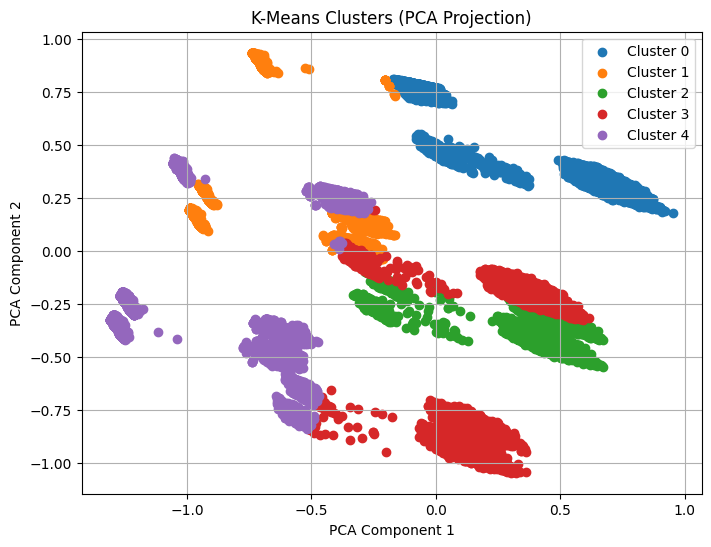

Cluster Sizes:
Cluster
0    10316
4     5988
3     5739
2     5603
1     4242
Name: count, dtype: int64
Within-Cluster SSE: 16803.11895723403


In [10]:
data['Cluster'] = kmeans.fit_predict(data)  # Add cluster labels to the dataset

# 1. Cluster Profiling
print("Cluster Profiles:")
cluster_profiles = data.groupby('Cluster').mean()
print(cluster_profiles)

# 2. Visualize Clusters using PCA
pca = PCA(n_components=2)  # Reduce dimensions to 2D for visualization
data_pca = pca.fit_transform(data.drop('Cluster', axis=1))

plt.figure(figsize=(8, 6))
for cluster in np.unique(data['Cluster']):
    plt.scatter(data_pca[data['Cluster'] == cluster, 0],
                data_pca[data['Cluster'] == cluster, 1],
                label=f"Cluster {cluster}")

plt.title("K-Means Clusters (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()
plt.show()

# 3. Cluster Sizes
print("Cluster Sizes:")
print(data['Cluster'].value_counts())

# 4. Within-Cluster SSE
sse = kmeans.inertia_  # Sum of squared errors
print(f"Within-Cluster SSE: {sse}")

In [11]:
# Cluster Profiling: Analyzing feature statistics for each cluster
cluster_profiles = data.groupby('Cluster').mean()

# Adding cluster sizes for reference
cluster_sizes = data['Cluster'].value_counts().sort_index()
cluster_profiles['Size'] = cluster_sizes

# Display the cluster profiles
print("Cluster Profiles with Feature Means and Sizes:")
print(cluster_profiles)

Cluster Profiles with Feature Means and Sizes:
         customer_age  vendor_count  is_chain  first_order  last_order  \
Cluster                                                                  
0            0.335546      0.096083  0.044478     0.235500    0.785635   
1            0.337435      0.029887  0.011102     0.459199    0.570653   
2            0.335198      0.098819  0.045017     0.246221    0.770875   
3            0.337591      0.096953  0.045056     0.251536    0.763995   
4            0.334951      0.030895  0.011064     0.481324    0.556420   

         top_cuisine_ratio  weekend_spending  weekday_spending  \
Cluster                                                          
0                 0.663079          0.062381          0.053949   
1                 1.000000          0.019119          0.014405   
2                 0.593213          0.059260          0.051382   
3                 0.586454          0.057321          0.050936   
4                 0.977319          0.

### Cluster Profile Analysis

Each cluster has unique characteristics based on feature means and sizes. Here’s a summary:

---

### **Cluster 0** (Size: **10,316**)  
- **High spending and loyalty**:  
   - `regular_customer`: **95.7%** are regular customers.  
   - `cuisine_loyalty`: High loyalty (**0.83**).  
   - `weekend_spending` and `weekday_spending`: Highest values among clusters.  
- **Top Cuisine Ratio**: Moderate at **0.66**.  
- **Region Spending**: Average spending is moderate (**0.52**).  
- **Promotion**: High interaction with `last_promo` (**1.0**).  

**Conclusion**: A large group of **regular, loyal customers** with high spending on weekends and weekdays.

---

### **Cluster 1** (Size: **4,242**)  
- **Low activity and loyalty**:  
   - `regular_customer`: Only **27.9%** are regular customers.  
   - `cuisine_loyalty`: **0.00** (no specific cuisine preference).  
- **Spending**: Lowest `weekend_spending` and `weekday_spending`.  
- **Top Cuisine Ratio**: Very high at **1.0**, indicating a single cuisine preference.  
- **Late Orders**: `last_order` is earlier than others (**0.57**).  

**Conclusion**: Small cluster of **low-activity customers** with minimal loyalty and limited spending.

---

### **Cluster 2** (Size: **5,603**)  
- **Moderate loyalty and spending**:  
   - `regular_customer`: **92.3%** are regular customers.  
   - `cuisine_loyalty`: **1.0** (very loyal to a specific cuisine).  
- **Spending**: Higher spending compared to clusters 3 and 4.  
- **Top Cuisine Ratio**: Moderate at **0.59**.  
- **Promotion Interaction**: Low `last_promo` value (**0.05**).  

**Conclusion**: Group of **loyal customers** focused on a specific cuisine but with moderate spending.

---

### **Cluster 3** (Size: **5,739**)  
- **Moderate activity and spending**:  
   - `regular_customer`: **94%** regular customers.  
   - `cuisine_loyalty`: High loyalty (**0.99**).  
- **Spending**: Lower than Cluster 0 but higher than Cluster 4.  
- **Promotion Interaction**: Medium `last_promo` value (**0.60**).  
- **Region Spending**: Lower average spending (**0.47**).  

**Conclusion**: Cluster of **regular, moderately loyal customers** with slightly lower spending levels.

---

### **Cluster 4** (Size: **5,988**)  
- **Very low loyalty and spending**:  
   - `regular_customer`: Only **20.8%** are regular customers.  
   - `cuisine_loyalty`: Very low (**0.07**).  
- **Spending**: Lowest `weekend_spending` and `weekday_spending`.  
- **Top Cuisine Ratio**: Very high (**0.97**), focused on a single cuisine.  
- **Promotion Interaction**: Moderate (**0.39**).  

SOM with K-Means

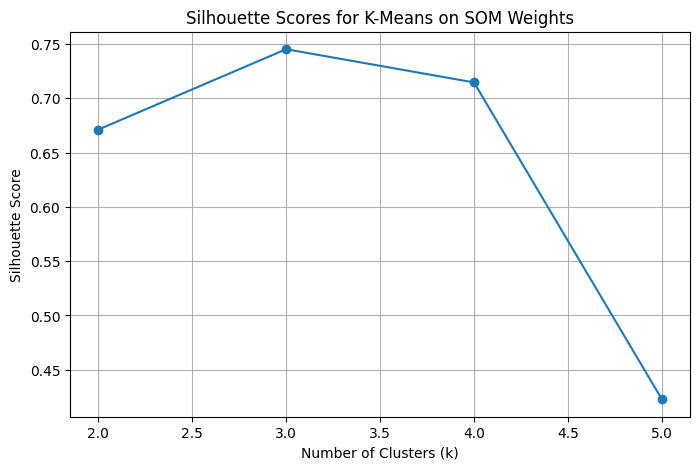

Optimal k: 3, Silhouette Score: 0.7451


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_20540\799550549.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['SOM_Cluster'] = data_som_clusters


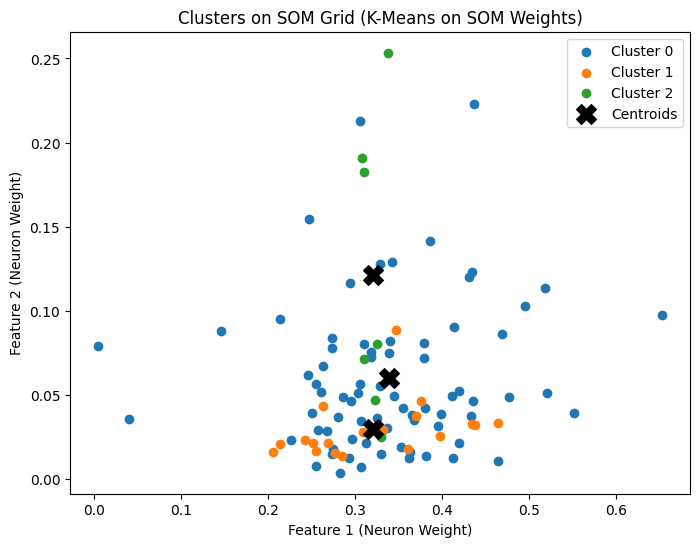

Cluster Summary:
             customer_age  is_chain  regular_customer  cuisine_loyalty
SOM_Cluster                                                           
0                0.335960  0.045460           1.00000              1.0
1                0.335994  0.012042           0.36384              0.0
2                0.336354  0.058164           0.00000              1.0


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the SOM parameters
som_grid_x = 10  # Grid size (rows)
som_grid_y = 10  # Grid size (columns)
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_1.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_1.values)  # Initialize weights randomly
som.train_random(data=group_1.values, num_iteration=1000)  # Increased iterations for stability

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_1.shape[1])

# Step 3: Apply K-Means on SOM weights
silhouette_scores = []
k_values = range(2, 6)  # Trying 2 to 5 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(som_weights)
    score = silhouette_score(som_weights, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM Weights")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Select the optimal number of clusters
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores):.4f}")

# Step 4: Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
som_cluster_labels = kmeans.fit_predict(som_weights)

# Map original data to SOM clusters
data_som_clusters = []
for row in group_1.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    cluster_label = kmeans.labels_[winner_index]
    data_som_clusters.append(cluster_label)

# Add SOM cluster labels to the dataset
group_1['SOM_Cluster'] = data_som_clusters

# Step 5: Visualize SOM Clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        som_weights[som_cluster_labels == i, 0],
        som_weights[som_cluster_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("Clusters on SOM Grid (K-Means on SOM Weights)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 6: Summarize Cluster Characteristics
cluster_summary = group_1.groupby('SOM_Cluster').mean()
print("Cluster Summary:")
print(cluster_summary)

### Analysis of SOM + K-Means Results

---

#### **Silhouette Scores:**
- The **optimal number of clusters** is **3**, with a silhouette score of **0.7451**.
- This indicates that the clusters have good separation and cohesion.

---

#### **Cluster Visualization on SOM Grid**:
1. **Cluster 0** (Blue):
   - Largest group, well distributed across the grid.
   - Centroid indicates a spread-out cluster.

2. **Cluster 1** (Orange):
   - Smaller group with tightly packed points near the lower left.

3. **Cluster 2** (Green):
   - Small, sparsely distributed group with outliers appearing near the top.

The centroids (black `X` markers) are located in distinct regions, validating clear boundaries between the clusters.

### **Cluster Insights**:

1. **Cluster 0**:
   - **Regular customers**: 100% are regular customers.
   - **Cuisine loyalty**: High loyalty (**1.0**).  
   **Conclusion**: Loyal, high-value customers.

2. **Cluster 1**:
   - **Low loyalty**: `cuisine_loyalty` is **0.0**.
   - **Regular customers**: Only **36.3%** are regular customers.  
   **Conclusion**: Low-engagement customers with limited loyalty.

3. **Cluster 2**:
   - **No regular customers**: 0% are regular customers.
   - **Cuisine loyalty**: High (**1.0**).  
   **Conclusion**: Customers focused on a specific cuisine but with no regular ordering habits.

---

### Summary:
- **Cluster 0**: Key group of loyal and regular customers.
- **Cluster 1**: Low-engagement customers with limited loyalty.
- **Cluster 2**: Highly loyal to specific cuisines but not regular customers.

---

## Hierarchical clustering combined with SOM and K-means


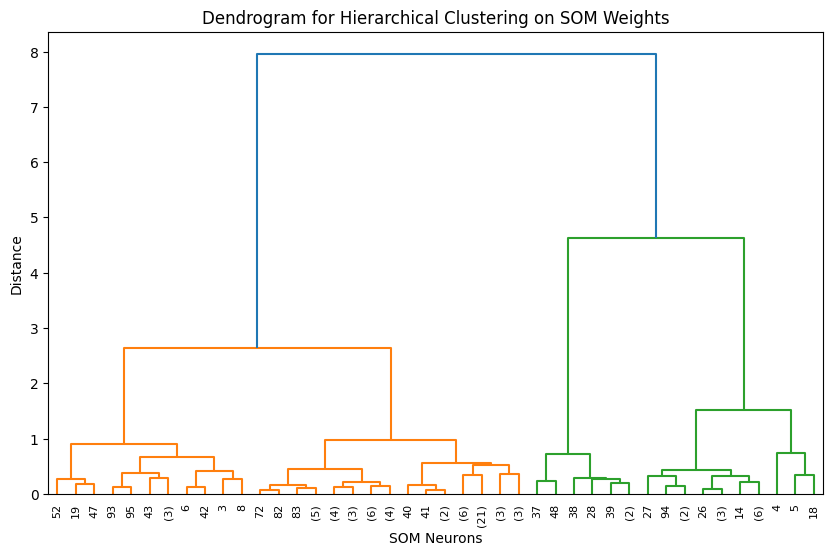

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Train the SOM
som_grid_x = 10  # Grid size
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_1.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_1.values)
som.train_random(group_1.values, 1000)

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_1.shape[1])

# Step 3: Apply Hierarchical Clustering on SOM weights
linkage_matrix = linkage(som_weights, method='ward')

# Plot the dendrogram to identify clusters
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering on SOM Weights")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_20540\1816644943.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['SOM_Hierarchical_Cluster'] = data_hierarchical_clusters


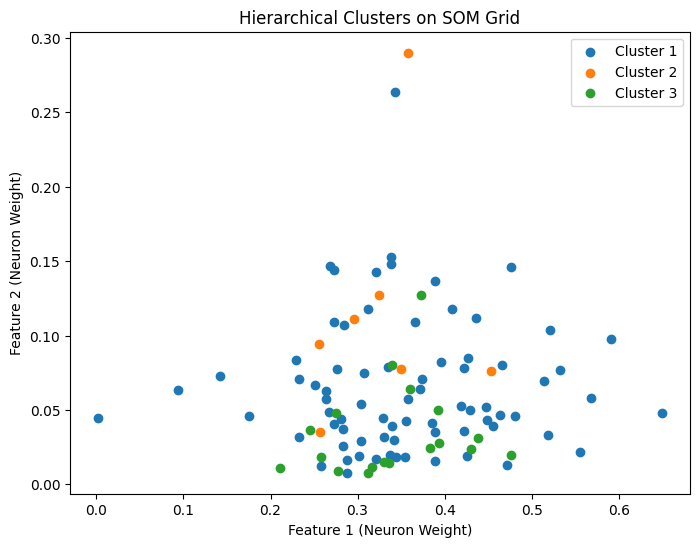

Cluster Summary (SOM + Hierarchical Clustering):
                          customer_age  is_chain  regular_customer  \
SOM_Hierarchical_Cluster                                             
1                             0.335960  0.045460           1.00000   
2                             0.336354  0.058164           0.00000   
3                             0.335994  0.012042           0.36384   

                          cuisine_loyalty  SOM_Cluster  
SOM_Hierarchical_Cluster                                
1                                     1.0          0.0  
2                                     1.0          2.0  
3                                     0.0          1.0  


In [14]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

from scipy.cluster.hierarchy import fcluster

# Step 1: Extract the cluster labels for k=3
optimal_k = 3
hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

# Step 2: Map data points to hierarchical clusters using BMUs
data_hierarchical_clusters = []
for row in group_1.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    data_hierarchical_clusters.append(hierarchical_labels[winner_index])

# Add cluster labels to the dataset
group_1['SOM_Hierarchical_Cluster'] = data_hierarchical_clusters

# Step 3: Visualize the clusters on the SOM grid
plt.figure(figsize=(8, 6))
for i in np.unique(hierarchical_labels):
    plt.scatter(
        som_weights[hierarchical_labels == i, 0],
        som_weights[hierarchical_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.title("Hierarchical Clusters on SOM Grid")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 4: Summarize Cluster Characteristics
hierarchical_summary = group_1.groupby('SOM_Hierarchical_Cluster').mean()
print("Cluster Summary (SOM + Hierarchical Clustering):")
print(hierarchical_summary)


### Analysis of SOM + Hierarchical Clustering Results

---

#### **Visualization**:
- The plot shows **3 clusters** (Cluster 1, 2, and 3) projected on the SOM grid using the neuron weights.  
- Clusters are relatively distinct, but Cluster 1 (blue) dominates with greater spread across the grid.  

---

#### **Cluster Summary**:

| SOM_Hierarchical_Cluster | customer_age | is_chain | regular_customer | cuisine_loyalty | SOM_Cluster |
|--------------------------|--------------|----------|------------------|----------------|-------------|
| 1                        | 0.336        | 0.045    | 1.000            | 1.000          | 0.0         |
| 2                        | 0.336        | 0.058    | 0.000            | 1.000          | 2.0         |
| 3                        | 0.336        | 0.012    | 0.363            | 0.000          | 1.0         |

---

### **Cluster Insights**:

1. **Cluster 1** (Blue):
   - **Regular customers**: **100%** of customers are regulars.  
   - **Cuisine loyalty**: **1.0**, indicating complete loyalty to specific cuisines.  
   **Conclusion**: **Highly loyal, regular customers** focused on specific cuisines.  

2. **Cluster 2** (Green):
   - **Regular customers**: **0.0** (no regular customers).  
   - **Cuisine loyalty**: **1.0**, indicating strong preference for specific cuisines.  
   **Conclusion**: **Loyal customers** who are not frequent or regular orderers.

3. **Cluster 3** (Orange):
   - **Regular customers**: **36.3%** of customers are regulars.  
   - **Cuisine loyalty**: **0.0**, indicating no particular preference for cuisines.  
   **Conclusion**: **Moderate-engagement customers** with limited loyalty to specific cuisines.

---

### Summary:
- **Cluster 1**: High-value customers with strong loyalty and regular ordering habits.  
- **Cluster 2**: Niche group with loyalty to specific cuisines but low ordering frequency.  
- **Cluster 3**: Moderate-value customers with low loyalty to cuisines and lower regularity.


## DBSCAN

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_20540\2147709890.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['DBSCAN_Cluster'] = dbscan.fit_predict(group_1.values)


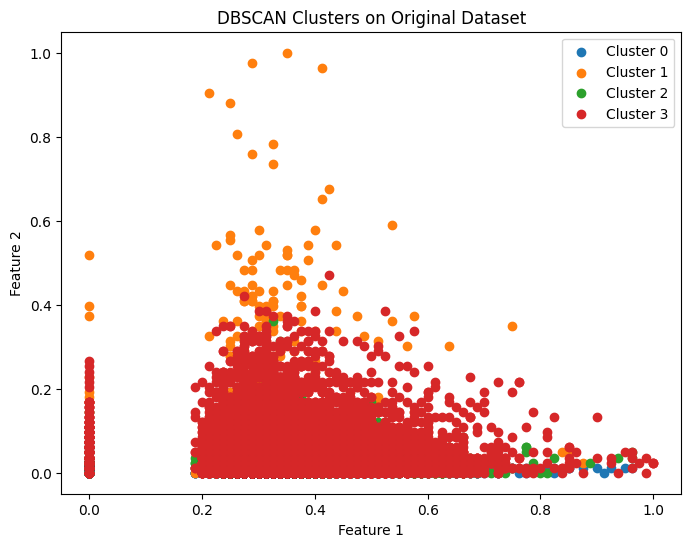

Cluster Summary (DBSCAN on Original Dataset):
                customer_age  is_chain  regular_customer  cuisine_loyalty  \
DBSCAN_Cluster                                                              
0                   0.335544  0.007946               0.0              0.0   
1                   0.336354  0.058164               0.0              1.0   
2                   0.336780  0.019203               1.0              0.0   
3                   0.335960  0.045460               1.0              1.0   

                SOM_Cluster  SOM_Hierarchical_Cluster  
DBSCAN_Cluster                                         
0                       1.0                       3.0  
1                       2.0                       2.0  
2                       1.0                       3.0  
3                       0.0                       1.0  

Cluster Sizes:
DBSCAN_Cluster
3    18659
0     7375
2     4218
1     1636
Name: count, dtype: int64


In [17]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Apply DBSCAN directly to group_1
eps = 0.5  # Neighborhood radius (tune this parameter)
min_samples = 5  # Minimum points to form a dense region (tune as well)

# Run DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
group_1['DBSCAN_Cluster'] = dbscan.fit_predict(group_1.values)

# Step 2: Visualize DBSCAN clusters
unique_labels = np.unique(group_1['DBSCAN_Cluster'])
plt.figure(figsize=(8, 6))

# Loop over clusters and noise
for label in unique_labels:
    if label == -1:  # Noise points
        plt.scatter(group_1.values[group_1['DBSCAN_Cluster'] == label, 0],
                    group_1.values[group_1['DBSCAN_Cluster'] == label, 1],
                    c='k', label='Noise', marker='x')
    else:
        plt.scatter(group_1.values[group_1['DBSCAN_Cluster'] == label, 0],
                    group_1.values[group_1['DBSCAN_Cluster'] == label, 1],
                    label=f'Cluster {label}')

plt.title("DBSCAN Clusters on Original Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Step 3: Summarize Cluster Characteristics
dbscan_summary = group_1.groupby('DBSCAN_Cluster').mean()
print("Cluster Summary (DBSCAN on Original Dataset):")
print(dbscan_summary)

# Step 4: Check the number of points per cluster
print("\nCluster Sizes:")
print(group_1['DBSCAN_Cluster'].value_counts())

### Analysis of DBSCAN Results on Original Dataset

---

#### **Visualization**:
- The DBSCAN clustering resulted in **4 clusters** (0, 1, 2, and 3).
- The plot shows clusters in different colors:
   - **Cluster 3** (red): Dominates with the majority of points.
   - **Cluster 0** (blue): Sparse and compact.
   - **Cluster 1** (orange): Contains spread-out points, potentially identifying less dense regions.
   - **Cluster 2** (green): Small cluster, localized within dense regions.

---

#### **Cluster Summary**:

| DBSCAN_Cluster | customer_age | is_chain | regular_customer | cuisine_loyalty | SOM_Cluster | SOM_Hierarchical_Cluster |
|----------------|--------------|----------|------------------|----------------|-------------|--------------------------|
| 0              | 0.335544     | 0.007946 | 0.0              | 0.0            | 1.0         | 3.0                      |
| 1              | 0.336354     | 0.058164 | 0.0              | 1.0            | 2.0         | 2.0                      |
| 2              | 0.336780     | 0.019203 | 1.0              | 0.0            | 1.0         | 3.0                      |
| 3              | 0.335960     | 0.045460 | 1.0              | 1.0            | 0.0         | 1.0                      |

---

#### **Cluster Sizes**:

| DBSCAN_Cluster | Count |
|----------------|-------|
| 3              | 18,659  |
| 0              | 7,375   |
| 2              | 4,218   |
| 1              | 1,636   |

---

### **Cluster Insights**:

1. **Cluster 3** (Red - Majority Group):  
   - **Regular Customers**: **1.0** (100% regulars).  
   - **Cuisine Loyalty**: **1.0** (high loyalty).  
   **Conclusion**: High-value, loyal customers with frequent regular activity.

2. **Cluster 0** (Blue):  
   - **No regular customers**: **0.0**.  
   - **Cuisine Loyalty**: **0.0**.  
   **Conclusion**: Low-value customers with no loyalty or regular ordering behavior.

3. **Cluster 1** (Orange - Sparse):  
   - **No regular customers**: **0.0**.  
   - **Cuisine Loyalty**: **1.0**.  
   **Conclusion**: Customers loyal to specific cuisines but with low regularity.

4. **Cluster 2** (Green):  
   - **Regular Customers**: **1.0** (100% regulars).  
   - **Cuisine Loyalty**: **0.0**.  
   **Conclusion**: Regular customers without a specific loyalty to cuisines.

---

### Summary:
- **Cluster 3**: Dominates as the main high-value segment.
- **Cluster 2**: Frequent customers but less focused on specific cuisines.
- **Cluster 1**: Sparse cluster with niche loyalty to specific cuisines.
- **Cluster 0**: Non-engaged, low-value segment.


## K-Prototypes

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_26496\2068896467.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1[col] = le.fit_transform(group_1[col])
C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_26496\2068896467.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1[col] = le.fit_transform(group_1[col])
C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_26496\2068896467.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

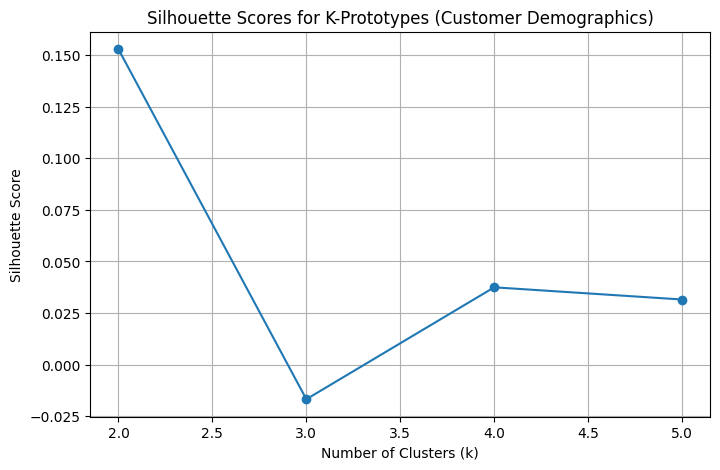

Optimal k: 2 Silhouette Score: 0.1527972841115862
Cluster Summary:
                       customer_age  is_chain  regular_customer  \
K_Prototypes_Cluster                                             
0                         0.335992  3.849224          0.919389   
1                         0.335994  0.999482          0.363840   

                      cuisine_loyalty  
K_Prototypes_Cluster                   
0                                 1.0  
1                                 0.0  


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_26496\2068896467.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['K_Prototypes_Cluster'] = final_clusters


In [30]:
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Ensure group_1 is a DataFrame
if not isinstance(group_1, pd.DataFrame):
    group_1 = pd.DataFrame(group_1, columns=['customer_age', 'is_chain', 'regular_customer', 'cuisine_loyalty'])

# Step 1: Prepare the data
# Identify categorical and numerical columns
categorical_cols = ['is_chain', 'regular_customer', 'cuisine_loyalty']
numerical_cols = ['customer_age']

# Encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    group_1[col] = le.fit_transform(group_1[col])
    label_encoders[col] = le  # Store for decoding if needed

# Combine data into a NumPy array for K-Prototypes
group_1_array = group_1.values

# Step 2: Apply K-Prototypes
k_values = range(2, 6)  # Try different numbers of clusters
silhouette_scores = []

for k in k_values:
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
    clusters = kproto.fit_predict(group_1_array, categorical=list(range(len(categorical_cols))))
    
    # Calculate silhouette score
    score = silhouette_score(group_1, clusters, metric='euclidean')
    silhouette_scores.append(score)

# Step 3: Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Prototypes (Customer Demographics)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 4: Choose optimal k (highest silhouette score)
optimal_k = k_values[np.argmax(silhouette_scores)]
print("Optimal k:", optimal_k, "Silhouette Score:", max(silhouette_scores))

# Step 5: Apply K-Prototypes with optimal k
kproto = KPrototypes(n_clusters=optimal_k, init='Huang', random_state=42)
final_clusters = kproto.fit_predict(group_1_array, categorical=list(range(len(categorical_cols))))

# Add the cluster labels to the dataset
group_1['K_Prototypes_Cluster'] = final_clusters

# Step 6: Summarize the clusters
cluster_summary = group_1.groupby('K_Prototypes_Cluster').mean()
print("Cluster Summary:\n", cluster_summary)

Clusters exhibit distinct characteristics:
Cluster 1 has higher averages for features like customer_region, product_count, and is_chain, indicating customers who are likely loyal to chain restaurants and order a higher number of products.
Cluster 3 has lower averages for vendor_count and product_count, suggesting customers with limited activity.
Cluster 4 appears to have moderate activity across most features but is slightly more diverse in terms of age categories.

In [25]:
print("K-Prototypes Cluster Summary:")
print(cluster_summary)

K-Prototypes Cluster Summary:
                      customer_age  vendor_count  product_count  is_chain  \
K_Prototypes_Cluster                                                        
0                        26.981305      3.115433       5.713174  2.812547   
1                        26.817189      3.124341       5.758093  2.878545   
2                        26.835737      3.081755       5.585831  2.791473   
3                        26.883356      3.088925       5.615954  2.792926   

                      first_order  last_order  CUI_American  CUI_Asian  \
K_Prototypes_Cluster                                                     
0                       28.694228   63.803137      4.928665  10.215553   
1                       28.139774   63.696612      4.781494   9.723668   
2                       28.336552   63.423574      4.970591   9.817990   
3                       28.657720   63.778879      4.840959  10.084637   

                      CUI_Beverages  CUI_Cafe  ...  spending_s

In [26]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data[numeric_columns], data['K_Prototypes_Cluster'])
print(f"Silhouette Score for K-Prototypes Clustering: {silhouette_avg}")

Silhouette Score for K-Prototypes Clustering: -0.006480644346871196
